Goal of this notebook is to figure out how to implement a multi layer neural net with just using numPy

i remember seeing this video a while back: https://www.youtube.com/watch?v=QmPBLroyHB0 and decided to see if i could try to train a neural net on the julia set

# Linear Regression on line

start simple to understand finding the partial derivatives

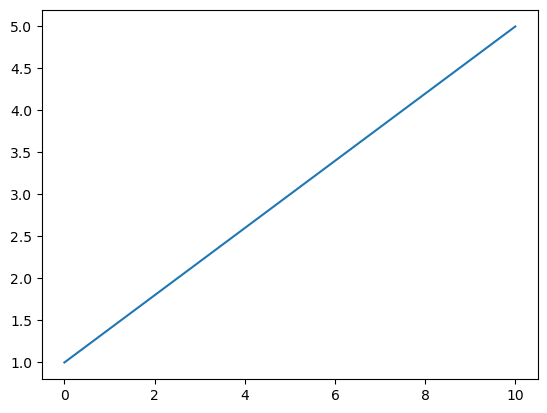

In [2]:

import numpy as np
fun = lambda x : 0.4* x + 1
X = np.linspace(0,10,20)
y = np.array([fun(x) for x in X])


import matplotlib.pyplot as plt
import numpy as np

plt.plot(X, y)  
plt.show() 

w_grad=array([-0.        , -0.12479215, -0.22861055, -0.31145523, -0.37332616,
       -0.41422336, -0.43414681, -0.43309654, -0.41107252, -0.36807477,
       -0.30410328, -0.21915805, -0.11323909,  0.01365362,  0.16152006,
        0.33036023,  0.52017415,  0.7309618 ,  0.96272319,  1.21545831])b_grad=array([-0.25703013, -0.23710508, -0.21718003, -0.19725498, -0.17732993,
       -0.15740488, -0.13747982, -0.11755477, -0.09762972, -0.07770467,
       -0.05777962, -0.03785457, -0.01792952,  0.00199553,  0.02192058,
        0.04184563,  0.06177068,  0.08169573,  0.10162078,  0.12154583])
-0.006774214801273809
0.008894751256701005


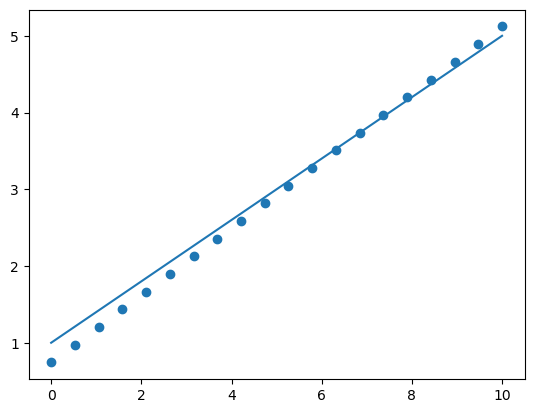

In [6]:
w = np.random.rand(1).astype(float)
b = np.random.rand(1).astype(float)

learning_rate = 0.01
for _ in range(100):
    y_pred = (w * X ) + b

    loss = (1/(2 * len(y_pred))) * np.sum((y_pred - y)**2)

    w_grad = (y_pred - y)*X
    b_grad = (y_pred - y)

    w =w - np.mean(learning_rate * w_grad)
    b =b - np.mean(learning_rate * b_grad)

print(f"{w_grad=}{b_grad=}")
print(2 * (np.mean(y_pred - y) / len(y_pred)))

print(loss)



plt.plot(X, y)  
plt.scatter(X,y_pred)
plt.show()

# Linear regression on simple curve

now needs to support multiple inputs

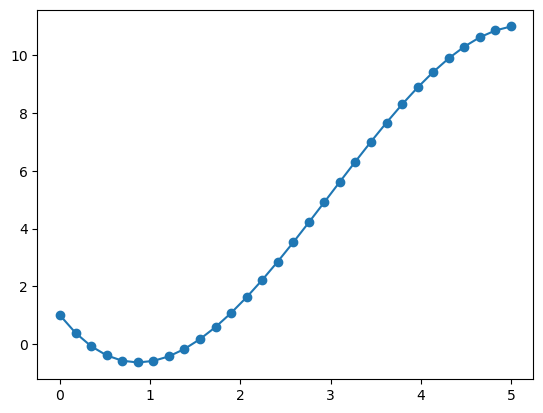

In [7]:
fun = lambda x :  (-0.3*(x**3)) + (2.7*(x**2))+ (-4*x) + 1
X = np.linspace(0,5,30)
y = np.array([fun(x) for x in X])

plt.plot(X, y)  
plt.scatter(X,y)
plt.show()

0.03142904709101846
w=array([-7.60569135, 15.17450306, -3.72258115])b=array([4.18965517])


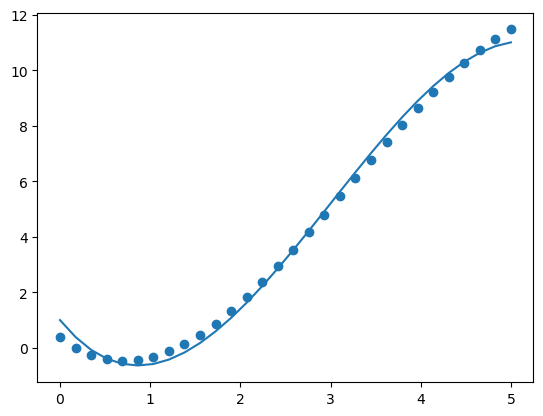

In [10]:
w = np.random.rand(3) * 2 - 1
b = np.random.rand(1) * 2 - 1


# engineered features
X_e = np.array([X**3, X**2, X])

# normalize to keep x**3 from overpowering other inputs
X_mean = X_e.mean(axis=1, keepdims=True)
X_std = X_e.std(axis=1, keepdims=True)
X_e = (X_e - X_mean) / X_std

learning_rate = 0.5
for _ in range(2000):
    #forward pass
    y_pred = (w.T @ X_e ) + b
    #find loss
    m = len(y)
    loss = (1/(2 * m)) * np.sum((y_pred - y)**2)

    #Backpropagation
    error = (y_pred - y)
    w_grad = (1/m) * (X_e @ error)
    b_grad = (1/m) * np.sum(error)

    #adjust weights
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad


print(loss)
print(f"{w=}{b=}")



plt.plot(X, y)  
plt.scatter(X,y_pred)
plt.show()

# 2 neurons chained into each other on simple curve

start figuring out back propagation by passing partial derivative to previous node 

0.08792063845459294
w=array([[2.09111559],
       [2.45830452]])
b=array([[ 1.48479192],
       [-0.26856665]])


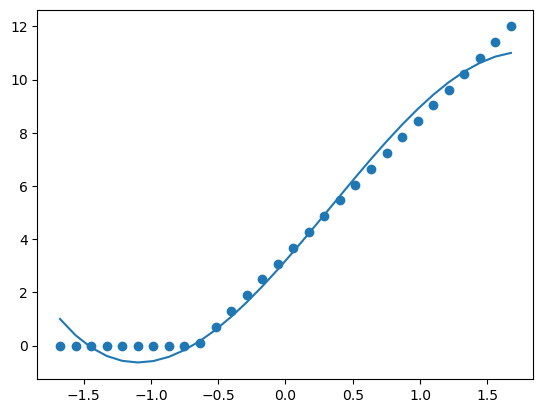

In [ ]:

fun = lambda x :  (-0.3*(x**3)) + (2.7*(x**2))+ (-4*x) + 1
X = np.linspace(0,5,30)
y = np.array([fun(x) for x in X])

# normalize
X = (X - X.mean()) / X.std()

def activation_grad(input):
    return np.array(input >0).astype(float)


def activation(input):
    return np.maximum(input,0)


def get_loss(y_true,y_predicted):
    m = len(y_true)
    return (1/(2 * m)) * np.sum((y_predicted - y_true)**2)

num_neurons = 2
w = (np.random.rand(num_neurons,1) * 2) - 1
b = (np.random.rand(num_neurons,1) * 2) - 1


w_grad = np.zeros((num_neurons,1))
b_grad = np.zeros((num_neurons,1)) 

# keep track of results
t = np.zeros((num_neurons,len(X)))  # w * a_prev
z = np.zeros((num_neurons,len(X)))  # t + b
a = np.zeros((num_neurons,len(X)))  # relu(z)
# # engineered features
# X_e = np.array([X**3, X**2, X])

# # normalize
learning_rate = 0.01
for _ in range(1000):
    #forward pass

    t[0] = (w[0] * X)
    z[0] = t[0] + b[0]
    a[0] = activation(z[0])



    t[1] = (w[1] * a[0])
    z[1] = t[1] + b[1]
    a[1] = activation(z[1])


    #find loss
    m = len(y)
    J = get_loss(y,a[1])

    # Backpropagation
    j_wrt_a1 = (a[1] - y) # d J wrt a[1]
    a1_wrt_z1 = activation_grad(z[1]) # d z[1] wrt a[1]

    z1_wrt_b1 = 1
    z1_wrt_t1 = 1
    t1_wrt_w1 = a[0]
    t1_wrt_a0 = w[1]

    a0_wrt_z0 = activation_grad(z[0])

    z0_wrt_b0 = 1
    z0_wrt_t0 = 1
    t0_wrt_w0 = X


    w_grad[1] = np.mean(j_wrt_a1 * a1_wrt_z1 * z1_wrt_t1 * t1_wrt_w1)
    b_grad[1] = np.mean(j_wrt_a1 * a1_wrt_z1 * z1_wrt_b1 )

    j_wrt_z0 = j_wrt_a1 * a1_wrt_z1 * z1_wrt_t1 * t1_wrt_a0 * a0_wrt_z0

    w_grad[0] = np.mean(j_wrt_z0 * z0_wrt_t0 * t0_wrt_w0)
    b_grad[0] = np.mean(j_wrt_z0 * z0_wrt_b0)


    # print(f"{w_grad=}\n{b_grad=}")
    #adjust weights
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad


print(J)
print(f"{w=}\n{b=}")



plt.plot(X, y)  
plt.scatter(X,a[1])
plt.show()

# N neurons in a single chain

generalize for n neurons


this model can't grasp any complex patterns when each layer just outputs a single value

10 neurons chained together seem to offer identical performance to a single neuron 


2.4321726127176984
w=array([[ 2.05098959],
       [ 2.02822612],
       [ 1.91847887],
       [ 1.96108726],
       [-2.58930945]])
b=array([[ 0.33512776],
       [ 0.25840369],
       [ 0.56338233],
       [-0.12135519],
       [ 0.8518809 ]])


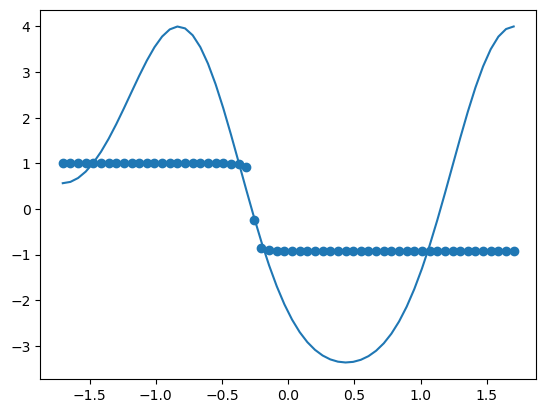

In [ ]:
fun = lambda x :  (-0.3*(x**3)) + (2.7*(x**2))+ (-4*x) + 1
fun = lambda x :  4 * np.sin((2*np.cos(x))+1)
X = np.linspace(0,5,60)
y = np.array([fun(x) for x in X])

# normalize
X = (X - X.mean()) / X.std()

def activation_grad(input):
    return tanh_derivative(input)
    return relu_function(input)


def activation(input):
    return tanh_function(input)
    return relu(input)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2
def tanh_function(x):
    return np.tanh(x)

def relu_function(input):
    return np.array(input >0).astype(float)
def relu(input):
    return np.maximum(input,0)

def get_loss(y_true,y_predicted):
    m = len(y_true)
    return (1/(2 * m)) * np.sum((y_predicted - y_true)**2)

num_neurons = 5
w = (np.random.rand(num_neurons,1) * 2) - 1 * 0.1
b = (np.random.rand(num_neurons,1) * 2) - 1 * 0.1


w_grad = np.zeros((num_neurons,1))
b_grad = np.zeros((num_neurons,1)) 


t = np.zeros((num_neurons,len(X)))  # w * a_prev
z = np.zeros((num_neurons,len(X)))  # t + b
a = np.zeros((num_neurons,len(X)))  # relu(z)
# # engineered features
# X_e = np.array([X**3, X**2, X])

# # normalize
learning_rate = 0.01
for i in range(10000):
    #forward pass

    #neuron 1
    t[0] = (w[0] * X)
    z[0] = t[0] + b[0]
    a[0] = activation(z[0])

    #neuron 2 to n
    for neuron in range(1,num_neurons):
        t[neuron] = (w[neuron] * a[neuron-1])
        z[neuron] = t[neuron] + b[neuron]
        a[neuron] = activation(z[neuron])


    #find loss
    m = len(y)
    J = get_loss(y,a[num_neurons - 1])

    # Backpropagation

    #loss grad
    j_wrt_a1 = (a[num_neurons-1] - y) # d J wrt a[1]

    j_wrt_a = j_wrt_a1 # activation 
    for neuron in range(num_neurons-1,0-1,-1):
        # j_wrt_a 

        a_wrt_z = activation_grad(z[neuron])
        z_wrt_b = 1
        z_wrt_t = 1
        t_wrt_w = X if neuron == 0 else a[neuron - 1]
        t_wrt_a = w[neuron]

        j_wrt_b = j_wrt_a * a_wrt_z * z_wrt_b
        j_wrt_w = j_wrt_a * a_wrt_z * z_wrt_t * t_wrt_w

        b_grad[neuron] = np.mean(j_wrt_b)
        w_grad[neuron] = np.mean(j_wrt_w)

        j_wrt_a = j_wrt_a * a_wrt_z * z_wrt_t * t_wrt_a   # set j_wrt_a for next previous neuron

        pass

    # print(f"{w_grad=}\n{b_grad=}")
    # print(f"{w=}\n{b=}")
    # if i % 100:
    #     print(J)
    #adjust weights
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad


print(J)
print(f"{w=}\n{b=}")



plt.plot(X, y)  
plt.scatter(X,a[num_neurons - 1])
plt.show()

# 1 layer with N neurons

Is able to fit the curve unlike the chain of single neurons

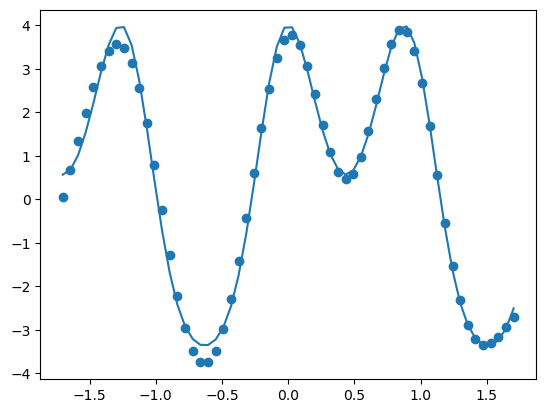

loss 0.026627343443175543


In [4]:

# fun = lambda x :  (-0.3*(x**3)) + (2.7*(x**2))+ (-4*x) + 1
fun = lambda x :  4 * np.sin((2*np.cos(x))+1)
X = np.linspace(0,10,60)
y = np.array([fun(x) for x in X])

# normalize
X = (X - X.mean()) / X.std()

def activation_grad(input):
    return tanh_derivative(input)
    # return relu_grad(input)

def activation(input):
    return tanh_function(input)
    # return relu(input)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2
def tanh_function(x):
    return np.tanh(x)

def relu_function(input):
    return np.array(input >0).astype(float)
def relu(input):
    return np.maximum(input,0)

def get_loss(y_true,y_predicted):
    m = len(y_true)
    return (1/(2 * m)) * np.sum((y_predicted - y_true)**2)

num_neurons = 1000
num_layers = 1 #only works with 1
w = ((np.random.rand(num_layers,num_neurons) * 2) - 1 ) * 3
b = ((np.random.rand(num_layers,num_neurons) * 2) - 1 ) * 3


w_grad = np.zeros((num_layers,num_neurons))
b_grad = np.zeros((num_layers,num_neurons)) 


t = np.zeros((num_layers,num_neurons,len(X)))  # w * a_prev
z = np.zeros((num_layers,num_neurons,len(X)))  # t + b
a = np.zeros((num_layers,num_neurons,len(X)))  # relu(z)
# # engineered features
# X_e = np.array([X**3, X**2, X])

# # normalize
learning_rate = 0.01
for i in range(1000):

# if True:

    layer = 0 #assume only 1 layer

    #forward pass
    for neuron in range(num_neurons):
        t[layer,neuron] = (w[layer,neuron] * X)
        z[layer,neuron] = t[layer,neuron] + b[layer,neuron]
        a[layer,neuron] = activation(z[layer,neuron])

    #second layer, sum of outputs
    sum_N = np.sum(a[layer],axis=0) #sum neuron

    #find loss
    m = len(y)
    J = get_loss(y,sum_N)

    # Backpropagation

    # #loss grad
    j_wrt_sumN = (sum_N - y) # d J wrt a[1]
    sumN_wrt_a = 1
    j_wrt_a = j_wrt_sumN * sumN_wrt_a

    # find gradient for each neuron
    for neuron in range(num_neurons):
        # j_wrt_a 

        a_wrt_z = activation_grad(z[0,neuron])
        z_wrt_b = 1
        z_wrt_t = 1
        # t_wrt_w = X if neuron == 0 else a[neuron - 1]
        t_wrt_w = X 
        t_wrt_a = w[0,neuron]

        j_wrt_b = j_wrt_a * a_wrt_z * z_wrt_b
        j_wrt_w = j_wrt_a * a_wrt_z * z_wrt_t * t_wrt_w

        b_grad[0,neuron] = np.mean(j_wrt_b)
        w_grad[0,neuron] = np.mean(j_wrt_w)

        # j_wrt_a = j_wrt_a * a_wrt_z * z_wrt_t * t_wrt_a   # set j_wrt_a for next previous neuron

        pass


    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
plt.plot(X, y)  
plt.scatter(X,sum_N)
plt.show()

print("loss",J)
# print(f"{w=}\n{b=}")





# N layers with M neurons in each layer

Implement multi layer neural network with knowledge gained from implementing 1 layer with N nodes, and N layers with 1 node each

Takes in a batch of inputs then finds the average of the gradient for each weight turing back pass

Big issue with this implementation is that it sacrifices performance for readability

If i'd choose to continue working on this i'd get rid of the Neuron object and vectorize weights per layer

In [ ]:
from matplotlib import pyplot as plt
from typing import List
import numpy as np

#define activation function
def relu_grad(input):
    return np.array(input >0).astype(float)
def relu_function(input):
    return np.maximum(input,0)
def tanh_derivative(x):
    return 1 - np.tanh(x)**2
def tanh_function(x):
    return np.tanh(x)
#define mse loss function (mean squared error)
def loss_fun(y_true,y_predicted): 
    m = len(y_true)
    return (1/(2 * m)) * np.sum((y_predicted - y_true)**2)
def loss_grad(y_true,y_predicted):
    return (y_predicted - y_true)

class Neuron:
    def __init__(self,input_size,batch_size,activation_fun,activation_grad):
        self.input_size = input_size
        self.batch_size = batch_size
        self.activation_fun = activation_fun
        self.activation_grad = activation_grad

        # init weighs and bias in [-1,1] range
        self.w = ((np.random.rand(self.input_size) * 2) - 1 ) 
        self.b = ((np.random.rand(1) * 2) - 1 ) 

        # self.w_grad = np.zeros_like(self.w)
        # self.b_grad = np.zeros_like(self.b)

    def forward(self,xIn):
        #store input and intermediate value for backpropigatin
        self.xIn = xIn 
        self.t = (self.w @ self.xIn) # (weights) * ()
        self.z = self.t + self.b
        self.a = self.activation_fun(self.z)
        return self.a
    
    def backward(self,j_wrt_a):
        #define partial derivatives for each operation
        a_wrt_z = self.activation_grad(self.z)
        z_wrt_b = 1
        z_wrt_t = 1
        t_wrt_w = self.xIn
        t_wrt_xIn = self.w

        #apply chain rule 
        j_wrt_b = j_wrt_a * a_wrt_z * z_wrt_b
        j_wrt_w = j_wrt_a * a_wrt_z * z_wrt_t * t_wrt_w
        self.j_wrt_w=j_wrt_w
        self.j_wrt_b=j_wrt_b
        #average gradient per batch
        self.b_grad = np.mean(j_wrt_b,axis=-1)
        self.w_grad = np.mean(j_wrt_w,axis=-1)

       #find j_wrt_Xin 
        j_wrt_z =  j_wrt_a * a_wrt_z 
        j_wrt_t = j_wrt_z * z_wrt_t
        j_wrt_Xin = np.outer(t_wrt_xIn,j_wrt_t )

        # assert j_wrt_Xin.shape == (self.input_size,self.batch_size), f"{j_wrt_Xin.shape} != {(self.input_size,self.batch_size)}"
        return j_wrt_Xin

    def tune(self,learning_rate):
        self.w -= learning_rate * self.w_grad
        self.b -= learning_rate * self.b_grad

class Layer:
    def __init__(self,input_size,output_size,batch_size,activation_fun=relu_function,activation_grad=relu_grad):
        self.input_size = input_size
        self.output_size = output_size
        self.batch_size = batch_size
        self.neurons = [Neuron(input_size=input_size,batch_size=batch_size,activation_fun=activation_fun,activation_grad=activation_grad) for _ in range(output_size)]

    def forward(self,activations):

        # assert activations.shape == (self.input_size,self.batch_size),f"{activations.shape} != {(self.input_size,self.batch_size)}"
        a = np.array([neuron.forward(activations) for neuron in self.neurons])

        # assert a.shape == (self.output_size,self.batch_size),f"{a.shape} != {(self.output_size,self.batch_size)}"
        return a

    def backward(self,j_wrt_a):
        # assert j_wrt_a.shape == (self.output_size,self.batch_size)
        partials = np.array([neuron.backward(j_wrt_a[i]) for i,neuron in enumerate(self.neurons)])

        # assert partials.shape == (self.output_size,self.input_size,self.batch_size),f"{partials.shape} != {(self.output_size,self.input_size,self.batch_size)}"
        # sum all neurons gradient to get total gradient vector for layer
        j_wrt_xIn = np.sum(partials,axis=0)

        # assert j_wrt_xIn.shape == (self.input_size,self.batch_size)
        return j_wrt_xIn
    def tune(self,learning_rate):
        for n in self.neurons:
            n.tune(learning_rate)

class MLP:
    def __init__(self,layers:List[Layer],loss_fun,loss_grad):
        self.loss_fun = loss_fun
        self.loss_grad = loss_grad
        self.layers:List[Layer] = layers
    def forward(self,activations,y_true):
        self.y_true = y_true
        self.activations = activations
        for layer in self.layers:
            self.activations = layer.forward(self.activations)
        self.loss = self.loss_fun(y_true,self.activations)
        return self.loss

    def backward(self):
        #find gradient of loss
        j_wrt_a = self.loss_grad(self.y_true,self.activations)
        #send through to each layer
        for layer in reversed(self.layers):
            j_wrt_a = layer.backward(j_wrt_a)
    
    def tune(self,learning_rate):
        for layer in self.layers:
            layer.tune(learning_rate)


is already significantly better performance with 2 hidden layers with 10 neurons each than 1000 neurons in single hidden layer

3.7524471543265654
0.8943599834235589
0.47857061177663146
0.37290416479915545
0.28983766693652074
0.21295386364394123
0.12729286762134154
0.05861919865814954
0.026661294111279172
0.01541829148310316


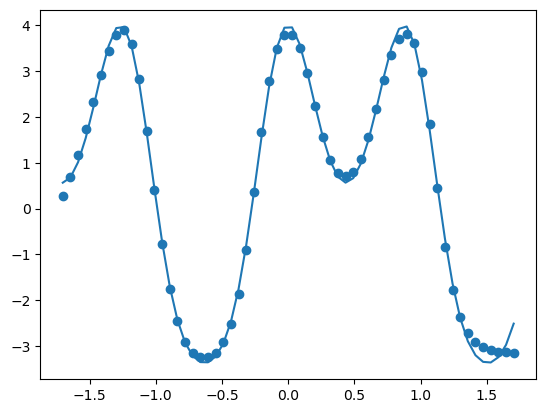

In [ ]:
fun = lambda x :  4 * np.sin((2*np.cos(x))+1)
X = np.linspace(0,10,60)
y = np.array([fun(x) for x in X])

# normalize

layers = [
    Layer(1,10,len(X),activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(10,10,len(X),activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(10,1,len(X),activation_fun=lambda x : x, activation_grad=lambda x : 1),
]
mlp = MLP(layers,loss_fun=loss_fun,loss_grad=loss_grad)

# # normalize
learning_rate = 0.01
for i in range(10000):
    loss = mlp.forward(
        activations= np.reshape(X,(1,len(X))),
        y_true=y)
    mlp.backward()
    mlp.tune(learning_rate)

    if i % 1000 == 0:
        print(loss)

plt.plot(X, y)  
plt.scatter(X,mlp.activations)
plt.show()

# print(J)

do something cool, try to get MLP to approximate fractal

for some reason I get much better performance with tanh as opposed to relu
- might be difficult for relu to center around that 0.5 threshold for final sigmoid activation function
- decision bounders are very smooth in this function which tanh might model better?

If i make my MLP model faster could do hyper parameter sweeps to compare different activation functions

Needs a lot more layers, current model is too unoptimized for anything more than 6 layers with 200 neurons each

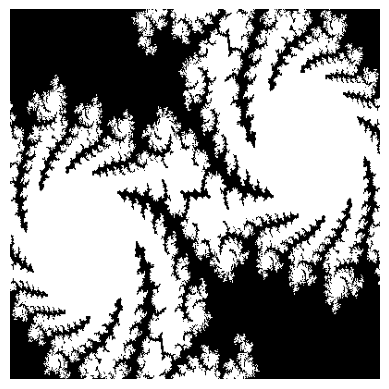

In [2]:

from PIL import Image
import matplotlib.pyplot as plt
#stolen from stack overflow
def julia_set(w=1000, h=1000, zoom=1.5, cX=-0.7, cY=0.27015, moveX=0.0, moveY=0.0, maxIter=150):
    arr = np.zeros((h, w), dtype=np.int16)

    for x in range(w):
        for y in range(h):
            zx = 1.5 * (x - w / 2) / (0.5 * zoom * w) + moveX
            zy = 1.0 * (y - h / 2) / (0.5 * zoom * h) + moveY
            i = maxIter
            while zx * zx + zy * zy < 4 and i > 1:
                tmp = zx * zx - zy * zy + cX
                zy, zx = 2.0 * zx * zy + cY, tmp
                i -= 1
            arr[y, x] = 1 if i == 1 else 0

    return arr


julia_set_train = julia_set(400, 400, zoom=2,maxIter=100)
plt.imshow(julia_set_train, cmap="gray")
plt.axis("off")
plt.show()


coordinates = []
for i,row in enumerate(julia_set_train):
    for j,pixel in enumerate(julia_set_train[i]):
        coordinates.append([i,j])

coordinates = np.array(coordinates)
coordinates = np.stack(coordinates,axis=-1)
labels = julia_set_train.flatten()

loss=np.float64(2.9666638589252985),acc=np.float64(0.50104375)
loss=np.float64(1.3499243269553616),acc=np.float64(0.6305625)
loss=np.float64(0.8714165187523925),acc=np.float64(0.6836625)
loss=np.float64(0.7955868313823935),acc=np.float64(0.72003125)
loss=np.float64(0.7133224035151382),acc=np.float64(0.73200625)
loss=np.float64(0.6745656804420869),acc=np.float64(0.74491875)
loss=np.float64(0.5969508291459774),acc=np.float64(0.75114375)
loss=np.float64(0.5838134968514401),acc=np.float64(0.75670625)
loss=np.float64(0.6186482641551936),acc=np.float64(0.75456875)
loss=np.float64(0.5786146437502694),acc=np.float64(0.76638125)
loss=np.float64(0.539105061805038),acc=np.float64(0.76765625)
loss=np.float64(0.4988869168648761),acc=np.float64(0.77423125)
loss=np.float64(0.45085944240290077),acc=np.float64(0.7852625)
loss=np.float64(0.42846088623680384),acc=np.float64(0.7864125)
loss=np.float64(0.51094485304022),acc=np.float64(0.78574375)
loss=np.float64(0.4486957725656779),acc=np.float64(0.7910062

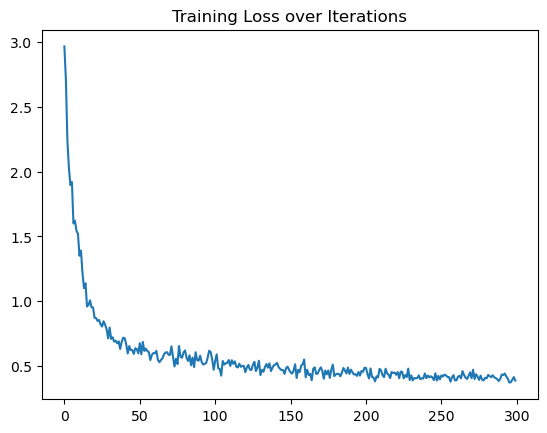

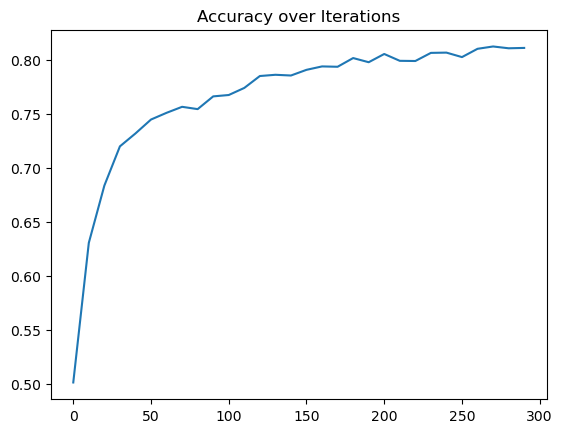

In [42]:
def sigmoid_function(x):
    return 1 / ( 1 + np.exp(-x))
    pass
def sigmoid_grad(x):
    sigmoid = 1 / ( 1 + np.exp(-x))
    return sigmoid * (1 - sigmoid)

def bce_function(y_true, y_predicted):
    """Binary Cross entropy"""
    eps=1e-7
    #clip any value smaller than eps as log(0) == Nan
    y_predicted = np.clip(y_predicted, eps, 1 - eps)  
    loss = -np.mean(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))
    return loss

def bce_grad(y_true, y_predicted):
    eps=1e-7
    y_predicted = np.clip(y_predicted, eps, 1 - eps)
    grad = (y_predicted - y_true) / (y_predicted * (1 - y_predicted) * len(y_true))
    return grad

batch_size = 5000
layers = [
    Layer(2,200,batch_size,activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(200,200,batch_size,activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(200,200,batch_size,activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(200,200,batch_size,activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(200,200,batch_size,activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(200,200,batch_size,activation_fun=tanh_function,activation_grad=tanh_derivative),
    Layer(200,1,batch_size,activation_fun=sigmoid_function, activation_grad=sigmoid_grad),

    # Layer(2,100,batch_size),
    # Layer(100,100,batch_size),
    # Layer(100,100,batch_size),
    # Layer(100,100,batch_size),
    # Layer(100,1,batch_size,activation_fun=sigmoid_function, activation_grad=sigmoid_grad),
]
mlp = MLP(layers,loss_fun = bce_function , loss_grad=bce_grad )
learning_rate = 1

#normalize coordinates
coordinates = coordinates / np.max(coordinates)

loss_time = []
accuracy = []
accuracy_iteration = []

for i in range(300):

    #my machine doesn't have enough memory to send through entire data set in a single pass
    #randomly select n amount of samples per iteration to send in as a batch
    sample_index= np.random.choice(len(labels), size=1000, replace=False)
    coordinates_sample = coordinates[:, sample_index]
    labels_sample = labels[sample_index]



    loss = mlp.forward(
        activations= coordinates_sample,
        y_true=labels_sample)
    mlp.backward()
    mlp.tune(learning_rate)

    if i % 10 == 0:
        #run model on whole dataset to get accuracy 
        mlp.forward(
            activations=coordinates,
            y_true=labels
        )
        predicted = mlp.activations
        predicted_image = predicted.reshape(julia_set_train.shape)
        predicted_binary = (predicted_image > 0.5).astype(int)
        acc = np.mean(predicted_binary == labels.reshape(julia_set_train.shape))
        accuracy.append([acc,i])


        print(f"{loss=},{acc=}")
    loss_time.append(loss)
accuracy = np.array(accuracy)
# plt.figure(figsize=(8,4))
plt.plot(loss_time)
plt.title("Training Loss over Iterations")
plt.show()
plt.plot(accuracy[:,1],accuracy[:,0])
plt.title("Accuracy over Iterations")
plt.show()


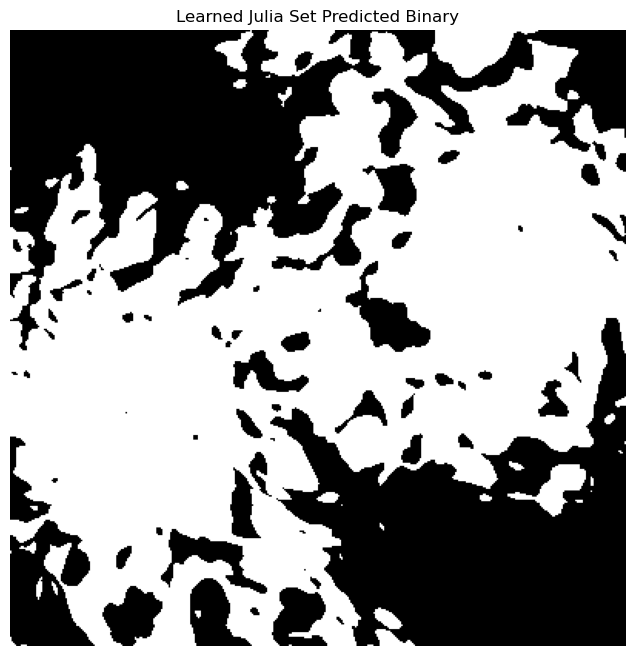

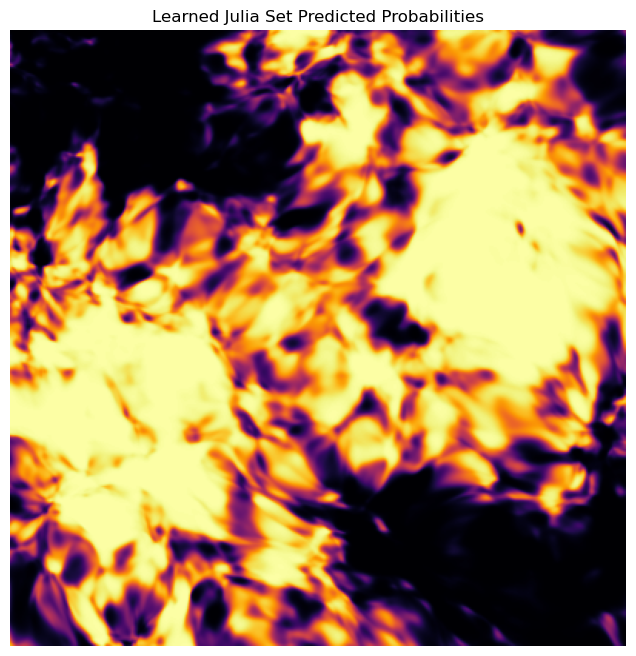

In [43]:
mlp.forward(
    activations=coordinates,  # shape (2, N)
    y_true=labels             # not used except for loss calc
)

predicted = mlp.activations
predicted_image = predicted.reshape(julia_set_train.shape)
predicted_binary = (predicted_image > 0.5).astype(int)

plt.figure(figsize=(8, 8))
plt.title("Learned Julia Set Predicted Binary")
plt.imshow((predicted_image > 0.5), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.title("Learned Julia Set Predicted Probabilities")
plt.imshow(predicted_image, cmap='inferno')
plt.axis('off')
plt.show()